In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Untitled Folder'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/Untitled Folder/rainfall.csv
/content/Untitled Folder/pesticides.csv
/content/Untitled Folder/temp.csv
/content/Untitled Folder/yield.csv
/content/Untitled Folder/yield_df.csv


In [ ]:
df = pd.read_csv('/content/Untitled Folder/yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.shape

(28242, 8)

In [ ]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

# Call the function
get_df_info(df)


Shape of DataFrame:  (28242, 8)

Columns in DataFrame:  ['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

Data types of columns:
 Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

Information about DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year         

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Create dropdowns
area_dropdown = widgets.Dropdown(options=df['Area'].unique(), description='Area:')
item_dropdown = widgets.Dropdown(options=df['Item'].unique(), description='Item:')

# Function to plot data
def plot_data(area, item):
    plt.figure(figsize=(10,6))
    temp_df = df[(df['Area'] == area) & (df['Item'] == item)]
    plt.plot(temp_df['Year'], temp_df['hg/ha_yield'])
    plt.title(f'hg/ha_yield over the years for {item} in {area}')
    plt.xlabel('Year')
    plt.ylabel('hg/ha_yield')
    plt.grid(True)
    plt.show()

# Use interactive function to automatically update the plot
widgets.interactive(plot_data, area=area_dropdown, item=item_dropdown)

interactive(children=(Dropdown(description='Area:', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'Arm…

In [ ]:
# Create dropdown
area_dropdown = widgets.Dropdown(options=df['Area'].unique(), description='Area:')

# Function to plot data
def plot_data(area):
    plt.figure(figsize=(10,6))
    temp_df = df[df['Area'] == area]
    plt.plot(temp_df['Year'], temp_df['pesticides_tonnes'])
    plt.title(f'Pesticides Tonnes over the years in {area}')
    plt.xlabel('Year')
    plt.ylabel('Pesticides Tonnes')
    plt.grid(True)
    plt.show()

# Use interactive function to automatically update the plot
widgets.interactive(plot_data, area=area_dropdown)

interactive(children=(Dropdown(description='Area:', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'Arm…

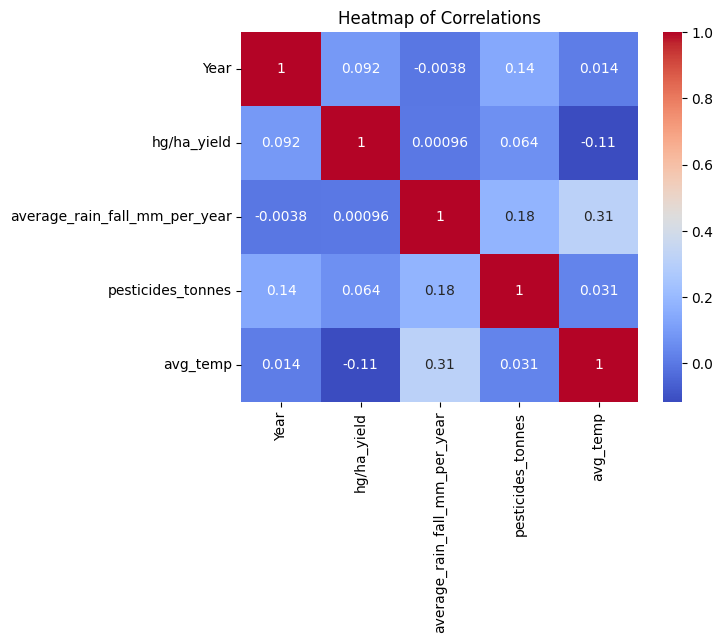

In [ ]:
# Correlation of numeric features
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

In [ ]:
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

In [ ]:
categorical_features = ['Area', 'Item']
numerical_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=101)),
    ('Random Forest', RandomForestRegressor(random_state=101)),
    ('Extra Trees', ExtraTreesRegressor(random_state=101)),
    ('Support Vector Machine', SVR())
]

In [ ]:
for name, model in models:
    # Create a pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R^2 Score: {r2}\n')

Linear Regression:
Mean Squared Error: 1750358946.2527072
Mean Absolute Error: 29124.410095167383
R^2 Score: 0.7509559421502012

Decision Tree:
Mean Squared Error: 125388999.87519915
Mean Absolute Error: 3484.5751460435476
R^2 Score: 0.9821594391221862

Random Forest:
Mean Squared Error: 84238917.77053303
Mean Absolute Error: 3428.922715524872
R^2 Score: 0.9880143430264045

Extra Trees:
Mean Squared Error: 64353670.59966091
Mean Absolute Error: 2584.094949548593
R^2 Score: 0.9908436499279303

Support Vector Machine:
Mean Squared Error: 8400823561.58569
Mean Absolute Error: 55849.77949324983
R^2 Score: -0.1952835122970502

